# Import the packages

In [ ]:

import statsmodels.api as sm
import statsmodels.tools

from sklearn.model_selection import train_test_split

## Imports
## Importing the big 4 - Pandas, Numpy, Seaborn & matplotlib
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
## Import the metrics we'll be using
from sklearn import metrics
## Import Logistic Regression from sklearn
from sklearn.linear_model import LogisticRegression

# Import the data

In [ ]:
df = pd.read_csv("sample_data/CVD_cleaned.csv")

# EDA

In [ ]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Diabetes,Arthritis,Sex,Age_Category,BMI,Smoking_History
0,Poor,Within the past 2 years,No,No,No,No,Yes,Female,70-74,14.54,Yes
1,Very Good,Within the past year,No,Yes,No,Yes,No,Female,70-74,28.29,No
2,Very Good,Within the past year,Yes,No,No,Yes,No,Female,60-64,33.47,No
3,Poor,Within the past year,Yes,Yes,No,Yes,No,Male,75-79,28.73,No
4,Good,Within the past year,No,No,No,No,No,Male,80+,24.37,Yes


In [ ]:
## After doing feature_importance I found that these columns are not needed

df.drop(columns = ['Other_Cancer', 'Depression', 'Height_(cm)', 'Weight_(kg)', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption'], inplace=True )

In [ ]:
df.dtypes

General_Health      object
Checkup             object
Exercise            object
Heart_Disease       object
Skin_Cancer         object
Diabetes            object
Arthritis           object
Sex                 object
Age_Category        object
BMI                float64
Smoking_History     object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   General_Health   308854 non-null  object 
 1   Checkup          308854 non-null  object 
 2   Exercise         308854 non-null  object 
 3   Heart_Disease    308854 non-null  object 
 4   Skin_Cancer      308854 non-null  object 
 5   Diabetes         308854 non-null  object 
 6   Arthritis        308854 non-null  object 
 7   Sex              308854 non-null  object 
 8   Age_Category     308854 non-null  object 
 9   BMI              308854 non-null  float64
 10  Smoking_History  308854 non-null  object 
dtypes: float64(1), object(10)
memory usage: 25.9+ MB


In [ ]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'BMI',
       'Smoking_History'],
      dtype='object')

In [ ]:
## Looking at how many people have Heart Disease and how many didn't

print(f"This is how many people have Heart Disease: {len(df.loc[df['Heart_Disease']=='Yes'])}")
print(f"This is how people don't have Heart Disease: {len(df.loc[df['Heart_Disease']=='No'])}")

This is how many people have Heart Disease: 24971
This is how people don't have Heart Disease: 283883


In [ ]:
df['General_Health'].unique()

array(['Poor', 'Very Good', 'Good', 'Fair', 'Excellent'], dtype=object)

In [ ]:
df['Checkup'].unique()

array(['Within the past 2 years', 'Within the past year',
       '5 or more years ago', 'Within the past 5 years', 'Never'],
      dtype=object)

In [ ]:
df['Exercise'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df['Heart_Disease'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df['Skin_Cancer'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df['Diabetes'].unique()

array(['No', 'Yes', 'No, pre-diabetes or borderline diabetes',
       'Yes, but female told only during pregnancy'], dtype=object)

In [ ]:
df['Arthritis'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df['Sex'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
df['Age_Category'].unique()

array(['70-74', '60-64', '75-79', '80+', '65-69', '50-54', '45-49',
       '18-24', '30-34', '55-59', '35-39', '40-44', '25-29'], dtype=object)

In [ ]:
df['BMI'].unique()

array([14.54, 28.29, 33.47, ..., 63.83, 19.09, 56.32])

In [ ]:
df['Smoking_History'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df.isnull().sum()

General_Health     0
Checkup            0
Exercise           0
Heart_Disease      0
Skin_Cancer        0
Diabetes           0
Arthritis          0
Sex                0
Age_Category       0
BMI                0
Smoking_History    0
dtype: int64

In [ ]:
df[['Sex']].value_counts()

Sex   
Female    160196
Male      148658
dtype: int64

In [ ]:
df[['Heart_Disease']].value_counts()

Heart_Disease
No               283883
Yes               24971
dtype: int64

In [ ]:
df[['General_Health']].value_counts()

General_Health
Very Good         110395
Good               95364
Excellent          55954
Fair               35810
Poor               11331
dtype: int64

In [ ]:
df[['Age_Category']].value_counts()

Age_Category
65-69           33434
60-64           32418
70-74           31103
55-59           28054
50-54           25097
80+             22271
40-44           21595
45-49           20968
75-79           20705
35-39           20606
18-24           18681
30-34           18428
25-29           15494
dtype: int64

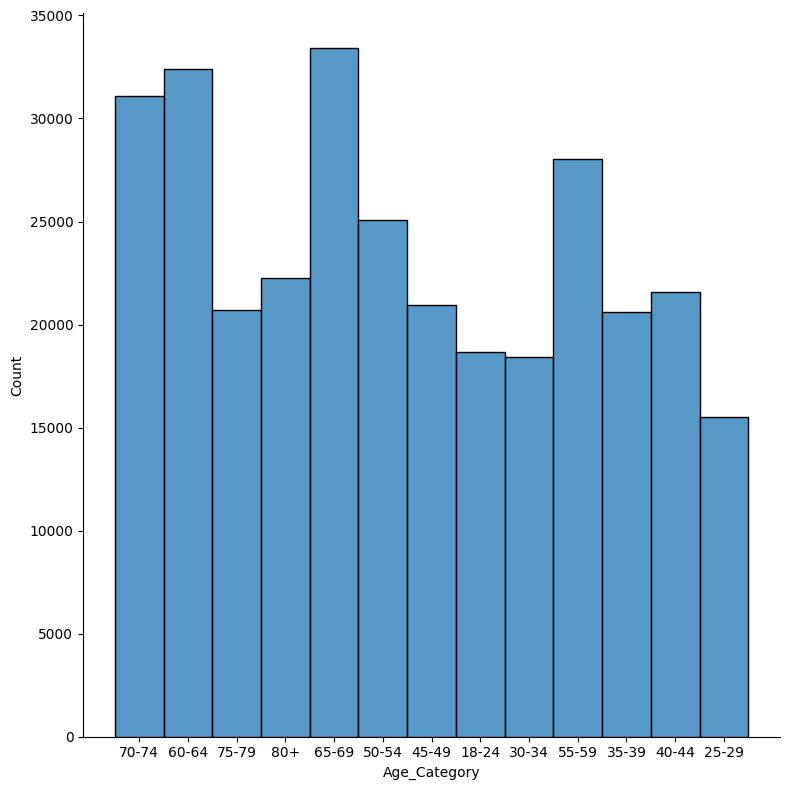

In [ ]:
sns.displot(df['Age_Category'],
            height = 8)
plt.show()

In [ ]:
df[['Checkup']].value_counts()

Checkup                
Within the past year       239371
Within the past 2 years     37213
Within the past 5 years     17442
5 or more years ago         13421
Never                        1407
dtype: int64

In [ ]:
df[['Exercise']].value_counts()

Exercise
Yes         239381
No           69473
dtype: int64

In [ ]:
df[['Skin_Cancer']].value_counts()

Skin_Cancer
No             278860
Yes             29994
dtype: int64

In [ ]:
df[['Diabetes']].value_counts()

Diabetes                                  
No                                            259141
Yes                                            40171
No, pre-diabetes or borderline diabetes         6896
Yes, but female told only during pregnancy      2646
dtype: int64

In [ ]:
df[['Arthritis']].value_counts()

Arthritis
No           207783
Yes          101071
dtype: int64

In [ ]:
df[['Smoking_History']].value_counts()

Smoking_History
No                 183590
Yes                125264
dtype: int64

### Aggregates

In [ ]:
gender = df.groupby(['Heart_Disease', 'Sex'])[['Sex']].count().sort_values(by='Heart_Disease', ascending = False)
gender

Sex
Heart_Disease Sex           
Yes           Female    9898
              Male     15073
No            Female  150298
              Male    133585

In [ ]:
df.groupby(['Heart_Disease', 'Checkup'])[['Checkup']].count().sort_values(by='Heart_Disease', ascending = False)

In [ ]:
df.groupby(['Checkup', 'Sex'])[['Sex']].count().sort_values(by='Checkup', ascending = False)

In [ ]:
df.groupby(['Heart_Disease', 'Exercise'])[['Exercise']].count().sort_values(by='Heart_Disease', ascending = False)

In [ ]:
df.groupby(['Heart_Disease', 'General_Health'])[['General_Health']].count().sort_values(by='Heart_Disease', ascending = False)

In [ ]:
df.groupby(['Heart_Disease', 'Age_Category'])[['Age_Category']].count().sort_values(by='Heart_Disease', ascending = False)

In [ ]:
df.groupby(['Heart_Disease', 'BMI'])[['BMI']].count().sort_values(by='Heart_Disease', ascending = False)

In [ ]:
df.groupby(['Heart_Disease', 'Smoking_History'])[['Smoking_History']].count().sort_values(by='Heart_Disease', ascending = False)

In [ ]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'BMI',
       'Smoking_History'],
      dtype='object')

## Visualising data

In [ ]:
## can't do .corr as BMI is the onyl numeric column

df.corr()

<ipython-input-40-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,BMI
BMI,1.0


<ipython-input-35-4e33e2d1d3c5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


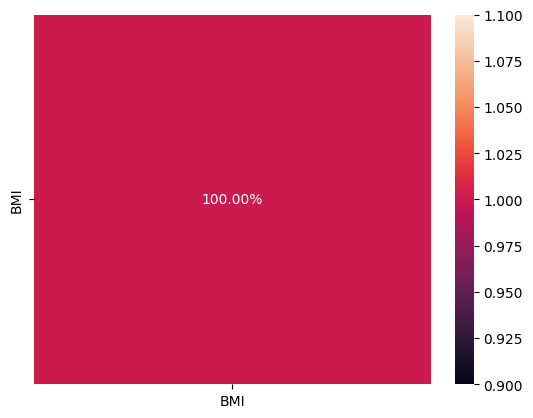

In [ ]:
sns.heatmap(df.corr(),
            annot = True,
            fmt ='0.2%')
plt.show()



In [ ]:
sns.pairplot(df,
             height = 3)
plt.show()

# Feature Engineering

In [ ]:
def feature_eng(df):
  df = df.copy()

  df['General_Health'] = df['General_Health'].map({'Poor':0, 'Fair':1, 'Good':2, 'Very Good': 3, 'Excellent':4})
  df['Checkup'] = df['Checkup'].map({'Within the past year':0, 'Within the past 2 years':1, 'Within the past 5 years':2, '5 or more years ago':3, 'Never':4 })
  df['Exercise'] = df['Exercise'].map({'No':0, 'Yes':1})
  df['Heart_Disease'] = df['Heart_Disease'].map({'No':0, 'Yes':1})
  df['Skin_Cancer'] = df['Skin_Cancer'].map({'No':0, 'Yes':1})
  #df['Other_Cancer'] = df['Other_Cancer'].map({'No':0, 'Yes':1})
  #df['Depression'] = df['Depression'].map({'No':0, 'Yes':1})
  df['Diabetes'] = df['Diabetes'].map({'No': 0,'No, pre-diabetes or borderline diabetes': 1 ,'Yes, but female told only during pregnancy': 2 ,'Yes': 3})
  df['Arthritis'] = df['Arthritis'].map({'No':0, 'Yes':1})
  df['Sex'] = df['Sex'].map({'Female':0, 'Male':1})
  df['Age_Category'] = df['Age_Category'].map({'18-24':0, '25-29':1, '30-34' : 2, '35-39': 3, '40-44': 4, '45-49':5, '50-54':6, '55-59':7, '60-64':8, '65-69':9, '70-74': 10, '75-79':11, '80+':12  })
  df['Smoking_History'] = df['Smoking_History'].map({'No':0, 'Yes':1})

  return df

In [ ]:
df2 = feature_eng(df)

In [ ]:
df2.dropna(inplace=True)

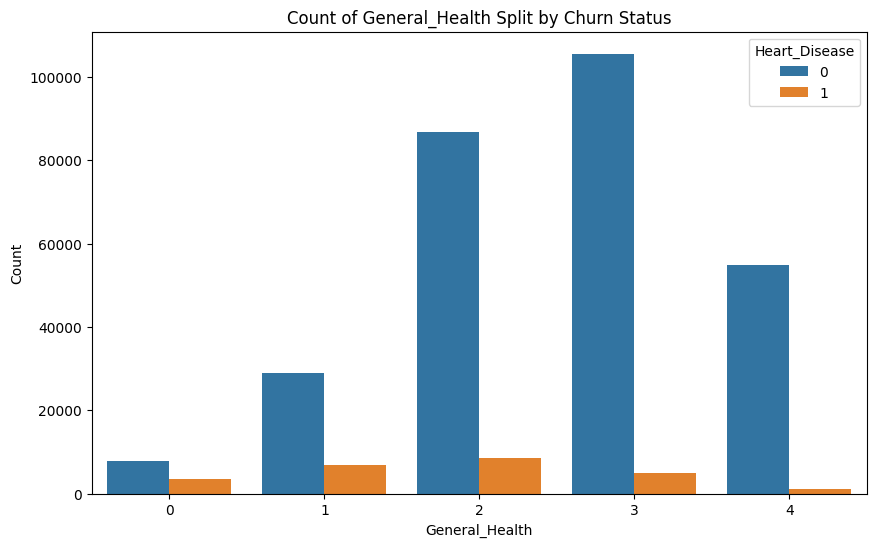

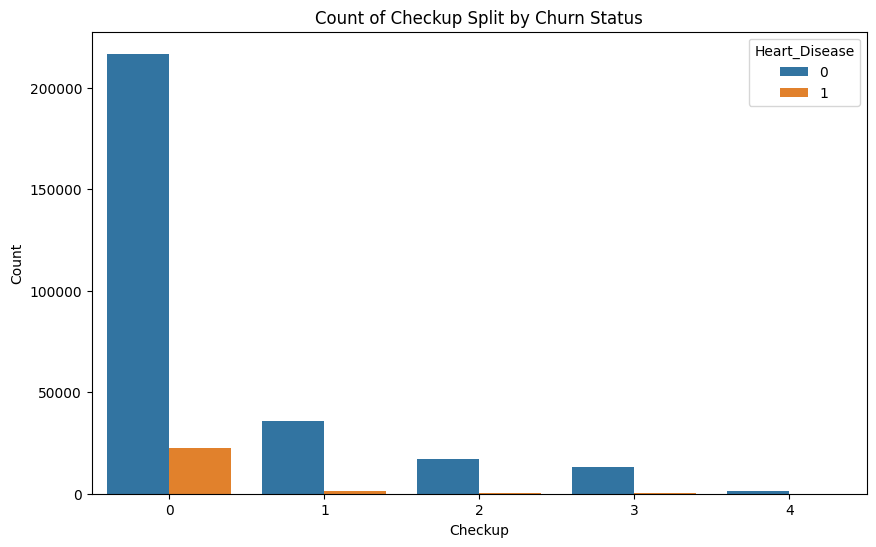

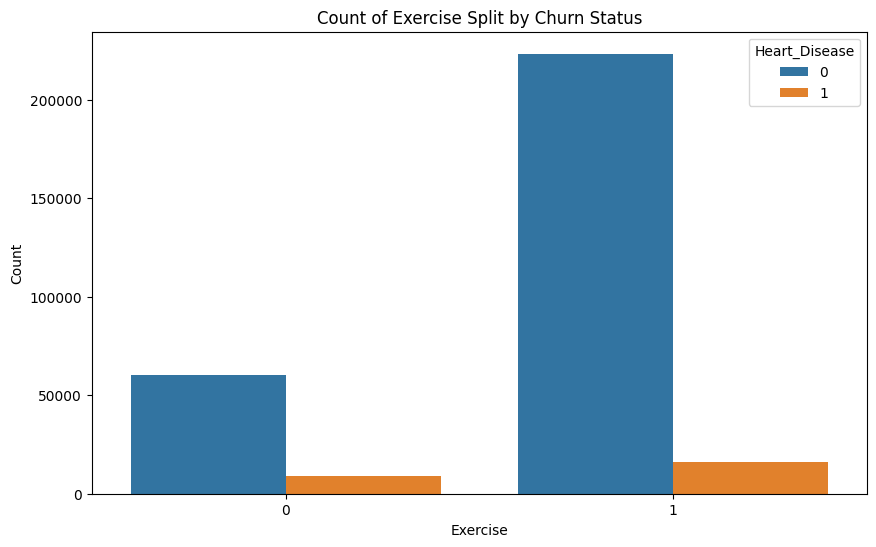

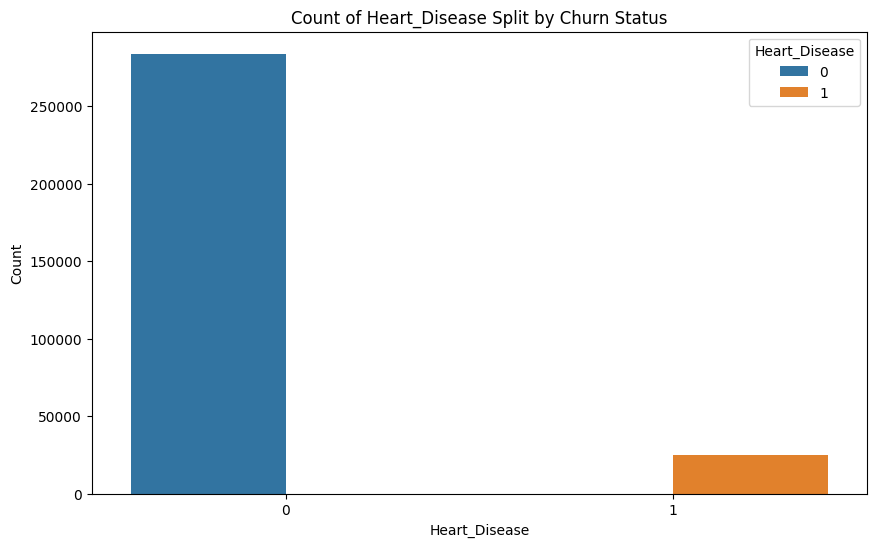

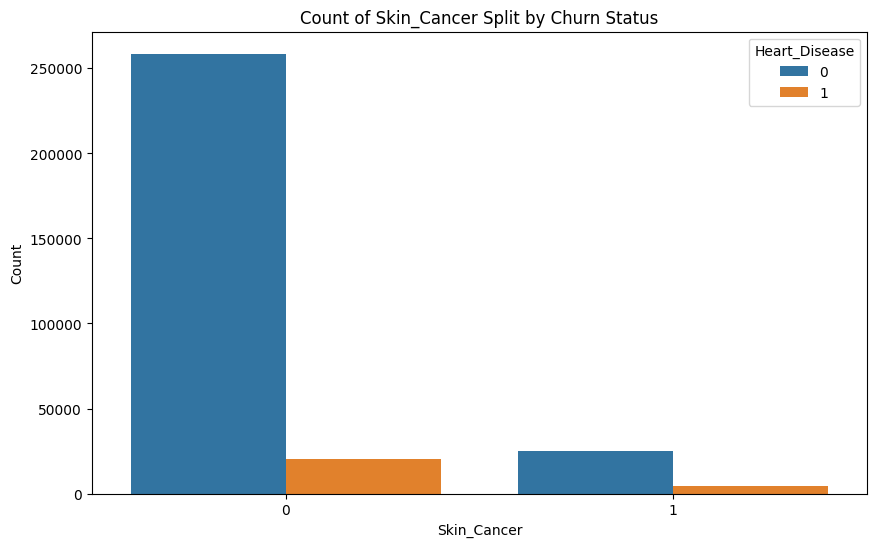

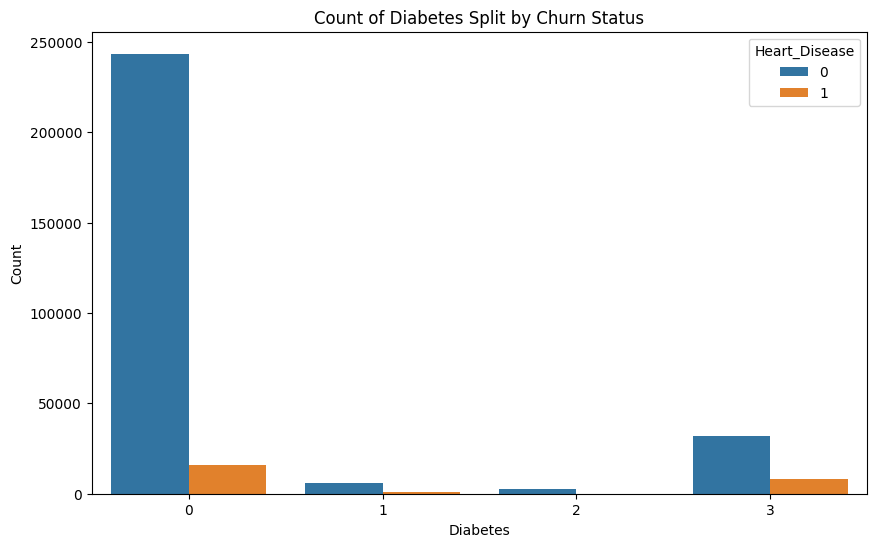

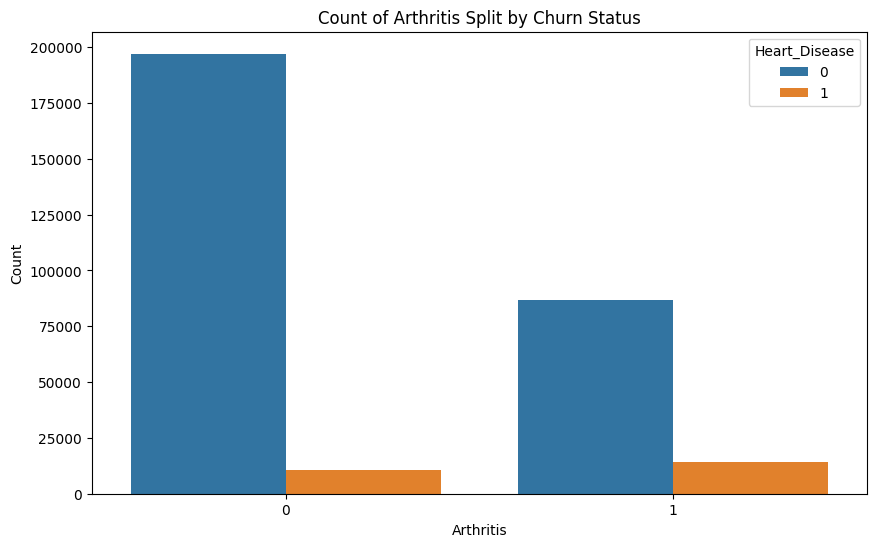

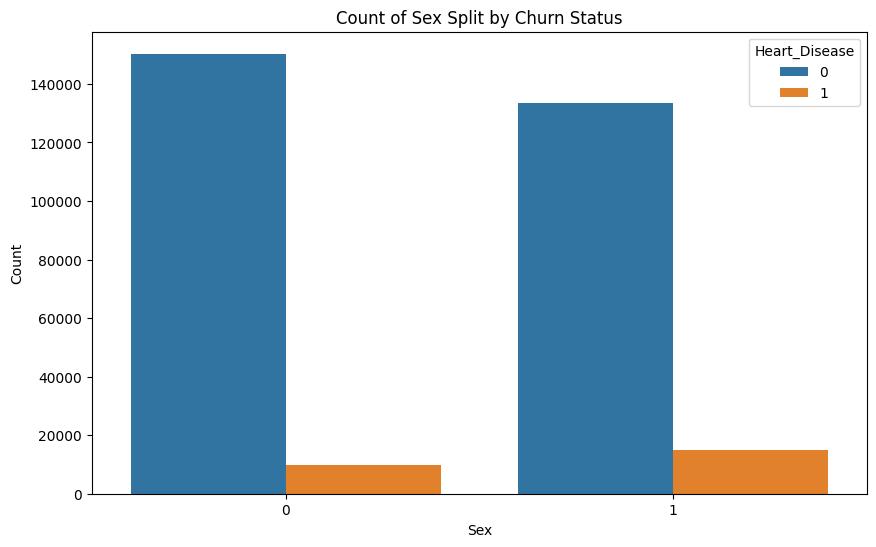

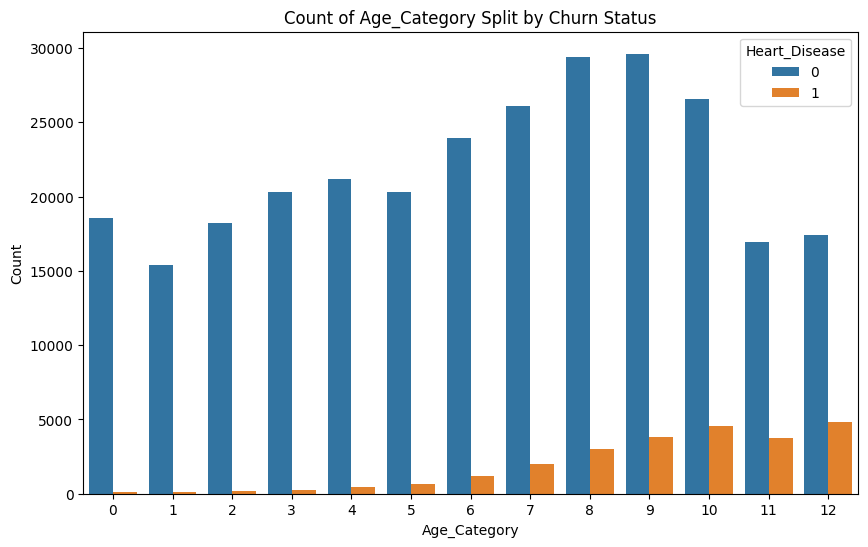

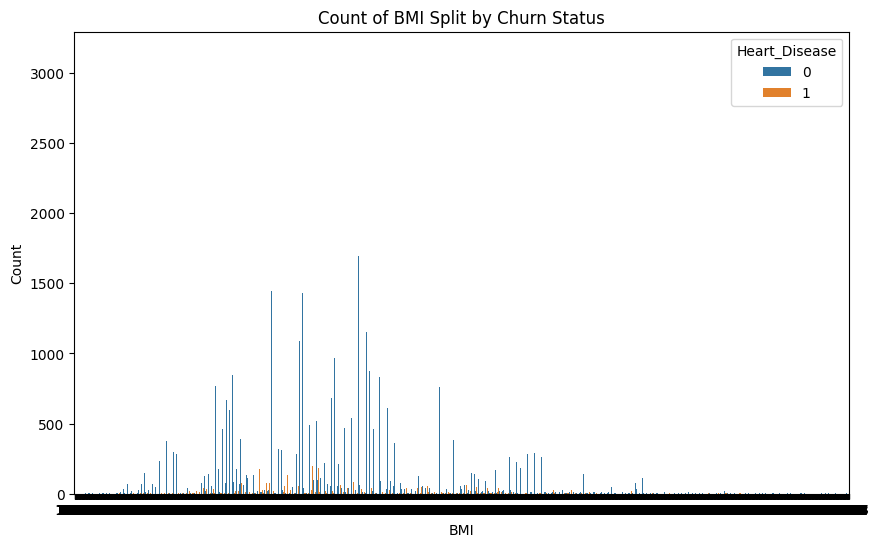

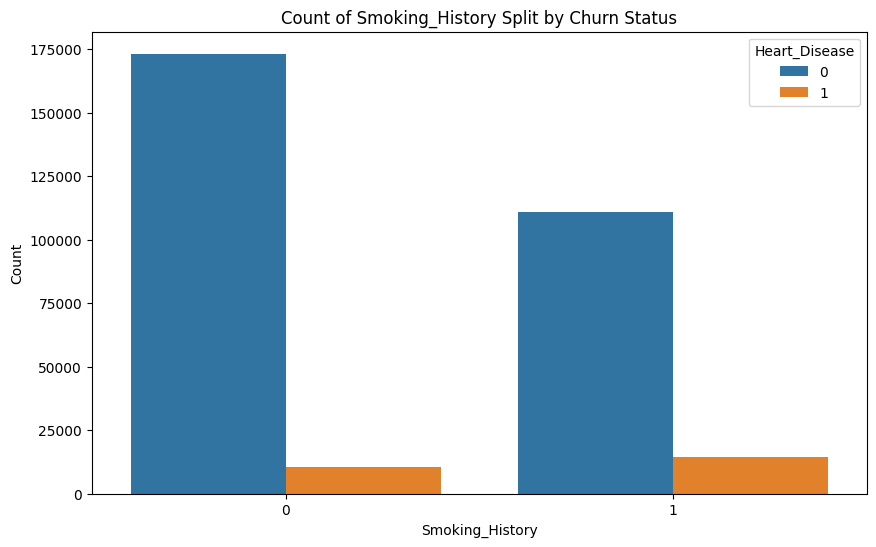

In [ ]:
for columns in df2.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=columns, hue="Heart_Disease", data= df2)
    plt.title(f'Count of {columns} Split by Churn Status')
    plt.xlabel(columns)
    plt.ylabel('Count')
    plt.show()

In [ ]:
# df2['Checkup'].unique()

In [ ]:
# df2['Checkup'].unique()

In [ ]:
# df2['Checkup'].astype(int)

In [ ]:
# df2.dtypes

In [ ]:
def input_features_detailed():
    # Define the conditions for each feature
    conditions = {
        'General_Health': (lambda x: 0 <= x <= 4, "0 - Poor| 1 - Fair| 2- Good| 3 - Very good| 4 - Excellent"),
        'Checkup': (lambda x: 0 <= x <= 4, "Within the past year - 0| Within the past 2 years - 1| Within the past 5 years - 2| 5 or more years ago - 3| Never: 4"),
        'Exercise': (lambda x: 0 <= x <= 1, "0 - No | 1 - Yes"),
        'Skin_Cancer': (lambda x: 0 <= x <= 1, "0 - No | 1 - Yes"),
        #'Other_Cancer': (lambda x: 0 <= x <= 1, "0 - No | 1 - Yes"),
        #'Depression': (lambda x: 0 <= x <= 1, "0 - No | 1 - Yes"),
        'Diabetes': (lambda x: 0 <= x <= 3, "0 - No| No, pre-diabetes or borderline diabetes- 1| Yes, but female told only during pregnancy - 2| Yes - 3 "),
        'Arthritis': (lambda x: 0 <= x <= 1, "0 - No | 1 - Yes"),
        'Sex': (lambda x: 0 <= x <= 1, "0 - Female | 1 - Male"),
        'Age_Catgeory': (lambda x: 0 <= x <= 12, "18-24 - 0| 25-29 - 1| 30-34 - 2| 35-39- 3| 40-44 - 4| 45-49 - 5| 50-54 - 6| 55-59 - 7| 60-64 - 8| 65-69 - 9| 70-74 - 10| 75-79 - 11| 80+ - 12 "),
        #'Height_(cm)': (lambda x: 91 <= x <= 234, "Input Values between 91-234"),
        #'Weight_(kg)': (lambda x: 24 <= x <= 294, "Input Values between 24-294"),
        'BMI': (lambda x: 12 <= x <= 99, "Input Values between 12-99"),
        'Smoking_History': (lambda x: 0 <= x <= 1, "0 - No | 1 - Yes"),
        #'Alcohol_Consumption': (lambda x: 0 <= x <= 30, "Input Values between 0-30"),
        #'Fruit_Consumption': (lambda x: 0 <= x <= 120, "Input Values between 0-120"),
        #'Green_Vegetables_Consumption': (lambda x: 0 <= x <= 120, "Input Values between 0-120"),
        #'FriedPotato_Consumption': (lambda x: 0 <= x <= 128, "Input Values between 0-128")
        }

    features = {}  # Dictionary to store the user-input values

    for feature, (condition, condition_range) in conditions.items():
        while True:
            value = input(f"Enter value for {feature} (between {condition_range}), or enter 'exit' to stop: ")
            if value.lower() == 'exit':
                print("Input exited by the user.")
                return None

            try:
                value = float(value)
                if not condition(value):
                    raise ValueError("Invalid Value has been inputted!")
                features[feature] = value
                break
            except ValueError:
                print("Invalid value has been inputted! Re-enter a correct value or enter 'exit' to get out of the loop")

    return pd.DataFrame([features])

In [ ]:
# def cleaning(df):

#     # Making all columns be formatted the same (stripped, lowercase, spacing, underscores in the middle)
#     clean_cols = list(df.columns)
#     new_cols = []
#     for col in clean_cols:
#         new_cols.append(col.strip().replace('  ', ' ').replace(' ', '').lower())
#     df.columns = new_cols

#     return df

#X-TRAIN

In [ ]:
features_3 = ['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer',
         'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'BMI', 'Smoking_History']

In [ ]:
X = df2[features_3].copy()

In [ ]:
y = df2['Heart_Disease'].copy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
lr = LogisticRegression(max_iter=300, random_state=10)

In [ ]:
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=300, random_state=10)

In [ ]:
lr.predict_proba(X_train)

array([[0.98581118, 0.01418882],
       [0.920267  , 0.079733  ],
       [0.9772757 , 0.0227243 ],
       ...,
       [0.97861877, 0.02138123],
       [0.91933071, 0.08066929],
       [0.98948387, 0.01051613]])

In [ ]:
X_train[['probability_no_HD', 'probability_HD']] = lr.predict_proba(X_train)

In [ ]:
X_train['y_pred'] = np.where(X_train['probability_HD']>.5, 1, 0)

In [ ]:
print(metrics.confusion_matrix(y_train, X_train['y_pred']))

[[225914   1195]
 [ 18758   1216]]


In [ ]:
def model_results(actual, predicted):
    print(f'Accuracy is: {metrics.accuracy_score(actual, predicted)}')
    print(f'Recall is: {metrics.recall_score(actual, predicted)}')
    print(f'Precision is: {metrics.precision_score(actual, predicted)}')
    print(f'F1-score is: {metrics.f1_score(actual, predicted)}')

In [ ]:
model_results(y_train, X_train['y_pred'])

Accuracy is: 0.9192457595221039
Recall is: 0.060879142885751476
Precision is: 0.5043550394027374
F1-score is: 0.1086441813714541


#X-TEST

In [ ]:
lr.fit(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=300, random_state=10)

In [ ]:
lr.predict_proba(X_test)

array([[0.9494679 , 0.0505321 ],
       [0.95112022, 0.04887978],
       [0.92893148, 0.07106852],
       ...,
       [0.70019923, 0.29980077],
       [0.95483228, 0.04516772],
       [0.98326131, 0.01673869]])

In [ ]:
X_test[['probability_HD', 'probability_HD']] = lr.predict_proba(X_test)

In [ ]:
X_test['y_pred'] = np.where(X_test['probability_HD']>.5, 1, 0)

In [ ]:
print(metrics.confusion_matrix(y_test, X_test['y_pred']))

[[56442   332]
 [ 4637   360]]


In [ ]:
model_results(y_test, X_test['y_pred'])

Accuracy is: 0.9195577212607858
Recall is: 0.07204322593556134
Precision is: 0.5202312138728323
F1-score is: 0.1265600281244507


# Logistic regression

In [ ]:
features_2 = ['General_Health', 'Heart_Disease', 'Checkup', 'Exercise', 'Skin_Cancer',
         'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'BMI', 'Smoking_History']

In [ ]:
df_model_2 = df2[features_2].copy()

In [ ]:
y = df_model_2['Heart_Disease'].copy()

In [ ]:
df_model_2.drop(columns = 'Heart_Disease', inplace=True)

In [ ]:
lr = LogisticRegression(max_iter=300, random_state=10)

In [ ]:
lr.fit(df_model_2, y)

LogisticRegression(max_iter=300, random_state=10)

In [ ]:
lr.predict_proba(df_model_2)

array([[0.71404376, 0.28595624],
       [0.93160135, 0.06839865],
       [0.95957947, 0.04042053],
       ...,
       [0.9945587 , 0.0054413 ],
       [0.94158066, 0.05841934],
       [0.99422944, 0.00577056]])

In [ ]:
df_model_2[['no_heart_disease', 'heart_disease']] = lr.predict_proba(df_model_2)

In [ ]:
df_model_2.head()

,General_Health,Checkup,Exercise,Skin_Cancer,Diabetes,Arthritis,Sex,Age_Category,BMI,Smoking_History,no_heart_disease,heart_disease
0,0,1,0,0,0,1,0,10,14.54,1,0.714044,0.285956
1,3,0,0,0,3,0,0,10,28.29,0,0.931601,0.068399
2,3,0,1,0,3,0,0,8,33.47,0,0.959579,0.040421
3,0,0,1,0,3,0,1,11,28.73,0,0.459504,0.540496
4,2,0,0,0,0,0,1,12,24.37,1,0.717911,0.282089


In [ ]:
df_model_2['y_pred'] = np.where(df_model_2['heart_disease']>.57, 1, 0)

In [ ]:
df_model_2.head(50)

,General_Health,Checkup,Exercise,Skin_Cancer,Diabetes,Arthritis,Sex,Age_Category,BMI,Smoking_History,no_heart_disease,heart_disease,y_pred
0,0,1,0,0,0,1,0,10,14.54,1,0.714044,0.285956,0
1,3,0,0,0,3,0,0,10,28.29,0,0.931601,0.068399,0
2,3,0,1,0,3,0,0,8,33.47,0,0.959579,0.040421,0
3,0,0,1,0,3,0,1,11,28.73,0,0.459504,0.540496,0
4,2,0,0,0,0,0,1,12,24.37,1,0.717911,0.282089,0
5,2,0,0,0,0,1,1,8,46.11,0,0.885310,0.114690,0
6,1,0,1,0,0,1,1,8,22.74,1,0.760770,0.239230,0
7,2,0,1,0,0,1,0,9,39.94,1,0.895682,0.104318,0
8,1,0,0,0,0,0,0,9,27.46,1,0.862109,0.137891,0
9,1,0,0,0,3,1,0,10,34.67,0,0.747809,0.252191,0


In [ ]:
df_model_2.tail(50)

,General_Health,Checkup,Exercise,Skin_Cancer,Diabetes,Arthritis,Sex,Age_Category,BMI,Smoking_History,no_heart_disease,heart_disease,y_pred
308804,2,0,1,0,2,0,0,3,23.59,1,0.976585,0.023415,0
308805,3,0,1,0,3,0,0,10,24.03,0,0.934706,0.065294,0
308806,1,0,1,0,3,0,0,4,39.51,0,0.952767,0.047233,0
308807,1,0,1,0,0,0,0,0,42.12,0,0.990352,0.009648,0
308808,2,0,0,1,0,0,0,10,32.92,0,0.919343,0.080657,0
308809,2,0,0,0,3,0,1,11,25.10,0,0.737466,0.262534,0
308810,3,1,1,0,0,0,1,4,27.98,1,0.980524,0.019476,0
308811,2,0,0,0,0,1,1,9,39.05,0,0.857995,0.142005,0
308812,2,0,1,0,0,0,1,8,29.05,0,0.918468,0.081532,0
308813,2,0,1,0,0,1,0,11,23.91,0,0.886863,0.113137,0


## Evaluate model

In [ ]:
print(metrics.confusion_matrix(y, df_model_2['y_pred']))

[[283210    673]
 [ 24184    787]]


In [ ]:
def get_results(actual, predicted):
    print("The confusion matrix for your predictions is:")
    print(metrics.confusion_matrix(actual, predicted), "\n")
    print(f'The accuracy of your model is: {metrics.accuracy_score(actual, predicted)}')
    print(f'The recall of your model is: {metrics.recall_score(actual, predicted)}')
    print(f'The precision of your model is: {metrics.precision_score(actual, predicted)}')
    print(f'The F1-score of your model is: {metrics.f1_score(actual, predicted)}')

In [ ]:
get_results(y, df_model_2['y_pred'])

The confusion matrix for your predictions is:
[[283210    673]
 [ 24184    787]] 

The accuracy of your model is: 0.9195186074973936
The recall of your model is: 0.03151655920868207
The precision of your model is: 0.5390410958904109
The F1-score of your model is: 0.05955128447656162


In [ ]:
print(metrics.classification_report(y, df_model_2['y_pred']))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96    283883
           1       0.54      0.03      0.06     24971

    accuracy                           0.92    308854
   macro avg       0.73      0.51      0.51    308854
weighted avg       0.89      0.92      0.89    308854



# Modelling

In [ ]:
# # trying out linear regression to see if it works

# def detailed_model():

#     features = ['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer',
#        'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
#        'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
#        'Alcohol_Consumption', 'Fruit_Consumption',
#        'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

#     #take inputs and convert them to a dataframe
#     input_df = input_features_detailed()

#     feature_eng(df)

#     X = df2[features].copy()
#     y = df2['Heart_Disease'].copy()

#     X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 63)

#     #transform training data
#     # X_train_fe, X_test_fe, input_fe = power_transform(X_train, X_test, input_df )


#     # X_train_fe, X_test_fe, input_fe = normaliser(X_train_fe, X_test_fe, input_fe)

#     # X_train_fe = sm.add_constant(X_train_fe)
#     # X_test_fe = sm.add_constant(X_test_fe)
#     # input_fe = sm.add_constant(input_fe, has_constant='add')

#     lin_reg = sm.OLS(y_train, X_train)
#     model = lin_reg.fit()

#     #uncomment below to see summary statistics of model
#     #print(model.summary())

#     y_pred_test = model.predict(X_test)

#     test_rmse = statsmodels.tools.eval_measures.rmse(y_test, y_pred_test)


#     #predict on inputs
#     input_pred = model.predict(input_df)

#     print(f"Predicted life expectancy of {input_pred} years")
#     print(f"RMSE value of {test_rmse}")


In [ ]:
# using logistic regression - need to ask alex about the output - i.e. what output do i want how do i evealuate the user's input

# def detailed_model2():

#     features = ['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer',
#        'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
#        'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
#        'Alcohol_Consumption', 'Fruit_Consumption',
#        'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

#     #take inputs and convert them to a dataframe
#     input_df = input_features_detailed()

#     #df = pd.read_csv('sample_data/CVD_cleaned.csv')

#     #df2 = feature_eng(df).copy()


#     df_model = df2[features].copy()

#     y = df2['Heart_Disease'].copy()

#     lr = LogisticRegression(max_iter=300, random_state=10)

#     lr.fit(df_model, y)

#     lr.predict_proba(df_model)

#     df_model[['prob_HD', 'prob_not_HD']] = lr.predict_proba(df_model)

#     df_model['y_pred'] = np.where(df_model['prob_not_HD']>.5, 1, 0)

#     def get_results(predicted):
#         if predicted >= 0.5:
#             return "Based on the information you provided, it is predicted that you have heart disease."
#         else:
#             return "Based on the information you provided, it is predicted that you do not have heart disease."

#     ## new part here
#     #return(df_model['y_pred'].values[0])

#     prediction = df_model['prob_HD'].values[0]
#     result_message = get_results(prediction)

#     #return result_message

#     #print(metrics.confusion_matrix(y, df_model['y_pred']))

#     def get_results_matrix(actual, predicted):
#       print("The confusion matrix for your predictions is:")
#       print(metrics.confusion_matrix(actual, predicted), "\n")
#       print(f'The accuracy of your model is: {metrics.accuracy_score(actual, predicted)}')
#       print(f'The recall of your model is: {metrics.recall_score(actual, predicted)}')
#       print(f'The precision of your model is: {metrics.precision_score(actual, predicted)}')
#       print(f'The F1-score of your model is: {metrics.f1_score(actual, predicted)}')

#     get_results_matrix(y, df_model['y_pred'])

#     print(metrics.classification_report(y, df_model['y_pred']))

#     return df_model['prob_HD'].values[0]

#     return result_message

#     #print(f" {df_model['y_pred']} ")
#     #print(f"RMSE value of {test_rmse}")

#     pass

In [ ]:
#detailed_model()

In [ ]:
#0	0	1	0	0	0	3	0	1	11	...	93.44	28.73	0	0.0	30.0	30.0	8.0	0.469575	0.530425	1

In [ ]:
#detailed_model2()

In [ ]:


# try to code to see if it works

# def detailed_model2():

#     features = ['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer',
#        'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
#        'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
#        'Alcohol_Consumption', 'Fruit_Consumption',
#        'Green_Vegetables_Consumption', 'FriedPotato_Consumption']


#     input_df = input_features_detailed()

#     # Create a DataFrame from user inputs
#     user_df = pd.DataFrame([input_df], columns=features)


#     #
#     print(user_df)


#     # Load your dataset (replace 'df2' with the actual dataset)
#    #df2 = pd.read_csv('sample_data/CVD_cleaned.csv')

#     df_model = df2[features].copy()

#     y = df2['Heart_Disease'].copy()

#     lr = LogisticRegression(max_iter=300, random_state=10)

#     lr.fit(df_model, y)

#     user_probabilities = lr.predict_proba(user_df)
#     user_df[['prob_HD', 'prob_not_HD']] = user_probabilities

#     user_df['y_pred'] = np.where(user_df['prob_not_HD'] > 0.5, 1, 0)

#     def get_results(predicted):
#         if predicted == 1:
#             return "Based on the information you provided, it is predicted that you have heart disease."
#         else:
#             return "Based on the information you provided, it is predicted that you do not have heart disease."

#     prediction = user_df['y_pred'].values[0]
#     result_message = get_results(prediction)

#     return result_message

# Example usage
# user_inputs = {
#     'General_Health': 3,
#     'Checkup': 1,
#     'Exercise': 1,
#     'Skin_Cancer': 0,
#     'Other_Cancer': 0,
#     'Depression': 0,
#     'Diabetes': 0,
#     'Arthritis': 1,
#     'Sex': 0,
#     'Age_Category': 2,
#     'Height_(cm)': 170,
#     'Weight_(kg)': 70,
#     'BMI': 24,
#     'Smoking_History': 0,
#     'Alcohol_Consumption': 2,
#     'Fruit_Consumption': 3,
#     'Green_Vegetables_Consumption': 2,
#     'FriedPotato_Consumption': 1
# }

# result = detailed_model2(user_inputs)
# print(result)

In [ ]:
#df2.info()

In [ ]:
#df2.isnull().sum()

In [ ]:
#detailed_model2()

In [ ]:
# features = ['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer',
#                 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
#                 'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
#                 'Alcohol_Consumption', 'Fruit_Consumption',
#                 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

## THIS IS THE MODEL TO USE

def input_features_detailed():
    # Define the conditions for each feature
    conditions = {
        'General_Health': (lambda x: 0 <= x <= 4, "0 - Poor| 1 - Fair| 2- Good| 3 - Very good| 4 - Excellent"),
        'Checkup': (lambda x: 0 <= x <= 4, "Within the past year - 0| Within the past 2 years - 1| Within the past 5 years - 2| 5 or more years ago - 3| Never: 4"),
        'Exercise': (lambda x: 0 <= x <= 1, "0 - No | 1 - Yes"),
        'Skin_Cancer': (lambda x: 0 <= x <= 1, "0 - No | 1 - Yes"),
        #'Other_Cancer': (lambda x: 0 <= x <= 1, "0 - No | 1 - Yes"),
        #'Depression': (lambda x: 0 <= x <= 1, "0 - No | 1 - Yes"),
        'Diabetes': (lambda x: 0 <= x <= 3, "0 - No| No, pre-diabetes or borderline diabetes- 1| Yes, but female told only during pregnancy - 2| Yes - 3 "),
        'Arthritis': (lambda x: 0 <= x <= 1, "0 - No | 1 - Yes"),
        'Sex': (lambda x: 0 <= x <= 1, "0 - Female | 1 - Male"),
        'Age_Category': (lambda x: 0 <= x <= 12, "18-24 - 0| 25-29 - 1| 30-34 - 2| 35-39- 3| 40-44 - 4| 45-49 - 5| 50-54 - 6| 55-59 - 7| 60-64 - 8| 65-69 - 9| 70-74 - 10| 75-79 - 11| 80+ - 12 "),
        #'Height_(cm)': (lambda x: 91 <= x <= 234, "Input Values between 91-234"),
        #'Weight_(kg)': (lambda x: 24 <= x <= 294, "Input Values between 24-294"),
        'BMI': (lambda x: 12 <= x <= 99, "Input Values between 12-99"),
        'Smoking_History': (lambda x: 0 <= x <= 1, "0 - No | 1 - Yes"),
        #'Alcohol_Consumption': (lambda x: 0 <= x <= 30, "Input Values between 0-30"),
        #'Fruit_Consumption': (lambda x: 0 <= x <= 120, "Input Values between 0-120"),
        #'Green_Vegetables_Consumption': (lambda x: 0 <= x <= 120, "Input Values between 0-120"),
        #'FriedPotato_Consumption': (lambda x: 0 <= x <= 128, "Input Values between 0-128")
        }

    features = {}  # Dictionary to store the user-input values

    for feature, (condition, condition_range) in conditions.items():
        while True:
            value = input(f"Enter value for {feature} (between {condition_range}), or enter 'exit' to stop: ")
            if value.lower() == 'exit':
                print("Input exited by the user.")
                return None

            try:
                value = float(value)
                if not condition(value):
                    raise ValueError("Invalid Value has been inputted!")
                features[feature] = value
                break
            except ValueError:
                print("Invalid value has been inputted! Re-enter a correct value or enter 'exit' to get out of the loop")

    return pd.DataFrame([features])


# def input_features_detailed():
#     input_dict = {}
#     for feature in features:
#         value = input(f"Enter value for {feature}: ")
#         input_dict[feature] = [value]
#     return input_dict

def detailed_model2():
    features = ['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer',
                 'Diabetes', 'Arthritis', 'Sex',
                'Age_Category', 'BMI', 'Smoking_History']

    input_df = input_features_detailed()
    user_df = pd.DataFrame(input_df, columns=features)

    df_model = df2[features].copy()
    y = df2['Heart_Disease'].copy()

    lr = LogisticRegression(max_iter=300, random_state=10)
    lr.fit(df_model, y)

    user_probabilities = lr.predict_proba(user_df)
    user_df[['prob_HD', 'prob_not_HD']] = user_probabilities

    user_df['y_pred'] = np.where(user_df['prob_not_HD'] > 0.5, 1, 0)

    def get_results(predicted):
        if predicted == 1:
            return "Based on the information you provided, it is predicted that you have heart disease."
        else:
            return "Based on the information you provided, it is predicted that you do not have heart disease."

    prediction = user_df['y_pred'].values[0]
    result_message = get_results(prediction)

    return result_message

# Call the function to get the prediction result
prediction_result = detailed_model2()
print(prediction_result)

pass


Enter value for General_Health (between 0 - Poor| 1 - Fair| 2- Good| 3 - Very good| 4 - Excellent), or enter 'exit' to stop: 0
Enter value for Checkup (between Within the past year - 0| Within the past 2 years - 1| Within the past 5 years - 2| 5 or more years ago - 3| Never: 4), or enter 'exit' to stop: 0
Enter value for Exercise (between 0 - No | 1 - Yes), or enter 'exit' to stop: 0
Enter value for Skin_Cancer (between 0 - No | 1 - Yes), or enter 'exit' to stop: 0
Enter value for Diabetes (between 0 - No| No, pre-diabetes or borderline diabetes- 1| Yes, but female told only during pregnancy - 2| Yes - 3 ), or enter 'exit' to stop: 3
Enter value for Arthritis (between 0 - No | 1 - Yes), or enter 'exit' to stop: 1
Enter value for Sex (between 0 - Female | 1 - Male), or enter 'exit' to stop: 1
Enter value for Age_Category (between 18-24 - 0| 25-29 - 1| 30-34 - 2| 35-39- 3| 40-44 - 4| 45-49 - 5| 50-54 - 6| 55-59 - 7| 60-64 - 8| 65-69 - 9| 70-74 - 10| 75-79 - 11| 80+ - 12 ), or enter 'exit

# CSV file created for those that have and don't have heart disease and some observations

In [ ]:
# list of those that dont'have heart disease but are the next most likely people

# Observations:
  #*General_Health responses are 0,1 and sometimes 2 - not higher than that
  #* most responses indicate that they don't do exercise
  #* majority of responses say yes to having diabetes
  #* some responsed yes to having arthritis
  #* majority of them are male
  # * majority of the people are old i.e. 60 years and older
  # * majority of people smoked i.e have/had a smoking history


df_model_2.loc[df_model_2['y_pred']==0].sort_values(by = 'no_heart_disease', ascending = True).head()

,General_Health,Checkup,Exercise,Skin_Cancer,Diabetes,Arthritis,Sex,Age_Category,BMI,Smoking_History,no_heart_disease,heart_disease,y_pred
3488,0,0,1,1,3,1,1,10,25.85,0,0.430004,0.569996,0
94568,1,0,0,0,3,1,1,11,33.45,1,0.430022,0.569978,0
96003,0,0,1,1,0,1,1,12,32.28,0,0.430107,0.569893,0
1384,0,0,1,0,0,1,1,11,29.29,1,0.430145,0.569855,0
203906,1,0,0,0,3,1,1,11,33.19,1,0.430238,0.569762,0


In [ ]:
print(f"This is how many people have Heart Disease: {len(df_model_2.loc[df_model_2['y_pred']==1])}")
print(f"This is how people don't have Heart Disease: {len(df_model_2.loc[df_model_2['y_pred']==0])}")

This is how many people have Heart Disease: 1460
This is how people don't have Heart Disease: 307394


In [ ]:
# Giving df a variable called no_HD

no_HD = df_model_2.loc[df_model_2['y_pred']==0].sort_values(by = 'no_heart_disease', ascending = True).head(307343)

In [ ]:
#Created a csv file

no_HD.to_csv("people_with_no_HD.csv", index =False)

In [ ]:
#Calling the csv file

pd.read_csv("people_with_no_HD.csv")

,General_Health,Checkup,Exercise,Skin_Cancer,Diabetes,Arthritis,Sex,Age_Category,BMI,Smoking_History,no_heart_disease,heart_disease,y_pred
0,0,0,1,1,3,1,1,10,25.85,0,0.430004,0.569996,0
1,1,0,0,0,3,1,1,11,33.45,1,0.430022,0.569978,0
2,0,0,1,1,0,1,1,12,32.28,0,0.430107,0.569893,0
3,0,0,1,0,0,1,1,11,29.29,1,0.430145,0.569855,0
4,1,0,0,0,3,1,1,11,33.19,1,0.430238,0.569762,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
307338,4,3,1,0,0,0,0,0,32.28,0,0.999172,0.000828,0
307339,4,3,0,0,0,0,0,0,21.46,0,0.999173,0.000827,0
307340,4,3,1,0,0,0,0,0,31.47,0,0.999174,0.000826,0
307341,4,3,0,0,0,0,0,0,20.27,0,0.999176,0.000824,0


In [ ]:
# csv file can be called by the variable name as well

no_HD

,General_Health,Checkup,Exercise,Skin_Cancer,Diabetes,Arthritis,Sex,Age_Category,BMI,Smoking_History,no_heart_disease,heart_disease,y_pred
3488,0,0,1,1,3,1,1,10,25.85,0,0.430004,0.569996,0
94568,1,0,0,0,3,1,1,11,33.45,1,0.430022,0.569978,0
96003,0,0,1,1,0,1,1,12,32.28,0,0.430107,0.569893,0
1384,0,0,1,0,0,1,1,11,29.29,1,0.430145,0.569855,0
203906,1,0,0,0,3,1,1,11,33.19,1,0.430238,0.569762,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
218924,4,3,1,0,0,0,0,0,32.28,0,0.999172,0.000828,0
96832,4,3,0,0,0,0,0,0,21.46,0,0.999173,0.000827,0
12476,4,3,1,0,0,0,0,0,31.47,0,0.999174,0.000826,0
132406,4,3,0,0,0,0,0,0,20.27,0,0.999176,0.000824,0


In [ ]:
# top 50 list of those most likely/ have heart disease

# Observations:
  #*General_Health responses are almost all 0
  #* some responses indicate that they don't do exercise
  #* majority said yes to having depression
  #* majority of responses say yes to having diabetes
  #* majority responsed yes to having arthritis
  #* early all of them are male
  # * majority of the people are old i.e. 70 years and older
  # * nearly all of people smoked i.e have/had a smoking history


df_model_2.loc[df_model_2['y_pred']==1].sort_values(by = 'no_heart_disease', ascending = True).head(50)

,General_Health,Checkup,Exercise,Skin_Cancer,Diabetes,Arthritis,Sex,Age_Category,BMI,Smoking_History,no_heart_disease,heart_disease,y_pred
2217,0,0,0,1,3,1,1,12,43.05,1,0.213183,0.786817,1
202463,0,0,0,1,3,1,1,12,36.25,1,0.217083,0.782917,1
253643,0,0,0,1,3,1,1,12,35.95,1,0.217256,0.782744,1
104948,0,0,0,1,3,1,1,12,34.44,1,0.218129,0.781871,1
53846,0,0,0,1,3,1,1,12,32.49,1,0.219261,0.780739,1
171562,0,0,0,1,3,1,1,12,31.79,1,0.219668,0.780332,1
37362,0,0,1,1,3,1,1,12,41.96,1,0.219799,0.780201,1
136681,0,0,0,1,3,1,1,12,31.02,1,0.220117,0.779883,1
263799,0,0,1,1,3,1,1,12,40.72,1,0.220523,0.779477,1
16283,0,0,0,1,3,1,1,12,30.13,1,0.220636,0.779364,1


In [ ]:
have_HD = df_model_2.loc[df_model_2['y_pred']==1].sort_values(by = 'no_heart_disease', ascending = True).head(1511)

In [ ]:
have_HD.to_csv("people_with_HD.csv", index =False)

In [ ]:
pd.read_csv("people_with_HD.csv")

,General_Health,Checkup,Exercise,Skin_Cancer,Diabetes,Arthritis,Sex,Age_Category,BMI,Smoking_History,no_heart_disease,heart_disease,y_pred
0,0,0,0,1,3,1,1,12,43.05,1,0.213183,0.786817,1
1,0,0,0,1,3,1,1,12,36.25,1,0.217083,0.782917,1
2,0,0,0,1,3,1,1,12,35.95,1,0.217256,0.782744,1
3,0,0,0,1,3,1,1,12,34.44,1,0.218129,0.781871,1
4,0,0,0,1,3,1,1,12,32.49,1,0.219261,0.780739,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,3,1,0,11,30.45,1,0.429822,0.570178,1
1456,1,0,0,0,3,1,1,11,33.67,1,0.429838,0.570162,1
1457,1,0,0,0,3,1,1,11,33.64,1,0.429863,0.570137,1
1458,0,0,1,0,0,1,1,11,29.53,1,0.429946,0.570054,1


# DT and Feature Importance

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# train test split
from sklearn.model_selection import train_test_split

# used for cross vlaidation
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (confusion_matrix, accuracy_score)

In [ ]:
feature_cols = ['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer',
                 'Diabetes', 'Arthritis', 'Sex',
                'Age_Category', 'BMI', 'Smoking_History']

In [ ]:
X = df2[feature_cols].copy()

In [ ]:
y = df2['Heart_Disease'].copy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)

In [ ]:
treeclf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [ ]:
# fig = plt.figure(figsize=(15,10))
# thing = tree.plot_tree(treeclf,
#                    feature_names=feature_cols,
#                    class_names=['no_HD', 'HD'],
#                    filled=True)

In [ ]:
print(f'Score on training set: {treeclf.score(X_train, y_train)}')
print(f'Score on testing set: {treeclf.score(X_test, y_test)}')


Score on training set: 0.9191607678391471
Score on testing set: 0.9191044341195707


In [ ]:
grid = GridSearchCV(estimator = DecisionTreeClassifier(), #  this is our classifier
                    param_grid = {'max_depth': [3, 5, 7, 10], ## giving the model an option of how many levels they can go down
                                  'min_samples_split': [5, 10, 15, 20, 50, 100], ## saying how many sample are needed in a node for the model to split i.e. if you say 10, and the node has 8 you cannot split it any further
                                  'min_samples_leaf': [2, 3, 4, 5, 6, 7],# saying how samples are needed in a node to call it a leaf
                                  'max_features':[2,5]}, # saying how many features you can use from - 2 or 5
                    cv = 10, # means how many times you can you can fold the trainign data and spolit a part and pretend its the testing data to see if you are overfiiting it
                    refit = True, # true by default
                    verbose = 0, # how mnay info you wnat back best to leave it to 0
                    scoring = 'precision')

In [1]:
grid_2 = GridSearchCV(estimator = LogisticRegression(), # classifier/algorithm
                     param_grid =  {'penalty': ['l1', 'l2'],
                    'C': [0.01, 0.1, 1.0, 10.0],
                    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga', 'newton-cholesky'],
                     'max_iter': [100, 200, 300],
                    'class_weight': [None, 'balanced']},
                     cv = 10,
                    refit = True,
                    verbose = 0,
                    scoring = 'precision')

NameError: ignored

In [ ]:
## don't run everytime It takes a while

grid.fit(X_train, y_train)

In [ ]:
grid_2.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

In [ ]:
grid.best_params_

{'max_depth': 7,
 'max_features': 2,
 'min_samples_leaf': 7,
 'min_samples_split': 20}

In [ ]:
grid.best_score_

0.6368456882977493

In [ ]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=7, max_features=2, min_samples_leaf=7,
                       min_samples_split=20)

In [ ]:
dt = grid.best_estimator_

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, max_features=2, min_samples_leaf=7,
                       min_samples_split=20)

In [ ]:
print(f'Score on training set: {dt.score(X_train, y_train)}')
print(f'Score on testing set: {dt.score(X_test, y_test)}')

Score on training set: 0.9192659956370937
Score on testing set: 0.9191691894254586


In [ ]:
train_results = X_train.copy()
train_results['y_pred'] = dt.predict(X_train)
train_results['y_real'] = y_train
train_results['y_prob'] = dt.predict_proba(X_train)[:,1]

train_results

,General_Health,Checkup,Exercise,Skin_Cancer,Diabetes,Arthritis,Sex,Age_Category,BMI,Smoking_History,y_pred,y_real,y_prob
192601,3,0,1,0,0,0,0,5,26.22,1,0,0,0.046118
196337,3,0,0,0,0,0,0,11,26.45,1,0,0,0.120649
99888,3,0,1,0,0,0,0,8,41.01,0,0,0,0.018549
282228,2,2,1,1,0,0,1,11,33.38,0,0,0,0.104990
216188,4,0,1,0,0,0,1,7,30.68,0,0,0,0.018549
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,4,3,1,0,0,0,1,10,24.54,0,0,0,0.007931
259178,2,0,1,0,0,0,1,0,23.11,0,0,0,0.043636
131932,1,1,0,0,0,0,1,2,26.45,0,0,0,0.019520
146867,2,0,1,0,0,0,1,7,52.77,0,0,0,0.043636


In [ ]:
dt.feature_importances_

array([0.42942261, 0.0396401 , 0.00987022, 0.07368604, 0.13915416,
       0.044348  , 0.05413329, 0.15023194, 0.01044886, 0.04906477])

In [ ]:
importance = list(zip(feature_cols, list(dt.feature_importances_)))

In [ ]:
## using feature importance to see which features are relevant to be used in my dataset

importance

[('General_Health', 0.5424705329537195),
 ('Checkup', 0.02130587834172951),
 ('Exercise', 0.002351106315313638),
 ('Skin_Cancer', 0.010768463966853813),
 ('Other_Cancer', 0.0),
 ('Depression', 0.0),
 ('Diabetes', 0.047257962184841344),
 ('Arthritis', 0.05406963622032605),
 ('Sex', 0.05096865133855461),
 ('Age_Category', 0.22837428165421753),
 ('Height_(cm)', 0.0),
 ('Weight_(kg)', 0.0),
 ('BMI', 0.004556420560569659),
 ('Smoking_History', 0.037877066463874294),
 ('Alcohol_Consumption', 0.0),
 ('Fruit_Consumption', 0.0),
 ('Green_Vegetables_Consumption', 0.0),
 ('FriedPotato_Consumption', 0.0)]